In [1]:
import pandas as pd
import requests
import numpy as np
import tweepy
import json
import seaborn as sns
import csv
import os
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

## Gathering Data
**1.The WeRateDogs Twitter archive is provided as a file on hand via Udacity server and imported by pandas as 'twitter-archive-enhanced.csv**

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.shape

(2356, 17)

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv**

In [5]:
# Using the Requests library to download the TSV file.
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Read in 2nd dataset 
image_predictions_1 = pd.read_csv('image_predictions.tsv', delimiter = '\t')

In [9]:
image_predictions_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.**

In [10]:
consumer_key = '7HNfTfwl5AL1e1DNLGDsNwVQp'
consumer_secret = 'fZUeBlSk3ngJJHePVUyrGiK2jiR9K1WcKZGariM5DoI9oHMubq'
access_token = '1278872364760080386-fNmPfmlOpE3sIi8MBcmQOvtgqVtcyP'
access_secret = '7nvRuJaEyqyJ7VcMHqFGUTkQdFg5zou0ZwYHRPvWv3zuN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#get access to twitter through api
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

#opens empty file (i downloaded) tweet_json to store tweet info
with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            #variable = through api get info(based on id)
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            #turns tweet into json format and puts it in the file (f)
            json.dump(tweet._json, f)
            
            #write to file whatever is in the ()
            f.write('\n')
            
        except: 
            print(tweet_id)
        

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 682


758740312047005698
754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 676


676957860086095872


In [11]:
#make empty list
tweets = []
#open file
tweet_json = open('tweet_json.txt', 'r')
#get each line in file


for line in tweet_json:
        
    try:        
        #turn it into parsable line (turns json format to dic.)
        tweet = json.loads(line)
        #add it to list
        tweets.append(tweet)
    except:
        j_line = json.dumps(line)
        tweet = json.loads(j_line)
        tweets.append(tweet)

#tweet_json.close()

#print(tweets[0])

#x = tweets[9]
#y = x['created_at']
#print(y)

In [14]:
retweets = []
favorites = []
ids = []

#p = tweets[2626]
counter = 0

for info in tweets:
    try:
        retweets.append(info['retweet_count'])
        favorites.append(info['favorite_count'])
        ids.append(info['id'])
        
        counter += 1
    except:
        print(counter)
        counter += 1

print("retweets")    
print(retweets)
print("ids")
print(ids)
print("favourites")
print(favorites)
print("end")

748
14787
14880
15009
15590
retweets
[7661, 5661, 3753, 7825, 8424, 2827, 1842, 17089, 3889, 6650, 6636, 4517, 9055, 4057, 2047, 4831, 4070, 3839, 3150, 3144, 4891, 10671, 16299, 9492, 5407, 6949, 2915, 4059, 2872, 4, 5723, 100, 6088, 5793, 3385, 16784, 3959, 16386, 5057, 4261, 5163, 18410, 2714, 3107, 8953, 3356, 6025, 3531, 4430, 5505, 10491, 4430, 3082, 9672, 7, 14485, 4790, 2535, 3475, 5639, 3785, 3934, 3171, 10, 2898, 40363, 2840, 6176, 4273, 2431, 3714, 6440, 1170, 6051, 1170, 6176, 17237, 73, 3461, 4741, 5072, 3033, 4274, 2157, 4249, 3893, 4469, 5537, 4300, 4224, 13259, 3756, 3635, 9356, 3601, 1456, 1456, 4959, 3410, 3338, 8283, 7415, 10074, 3202, 3196, 5250, 5062, 3516, 5695, 3, 2424, 24421, 3818, 7661, 9340, 5815, 2883, 3483, 13347, 1921, 4903, 1921, 3870, 6818, 2305, 112, 7322, 4457, 3245, 32730, 13259, 7800, 5230, 4664, 7179, 8106, 2820, 8271, 3868, 3920, 2273, 4912, 89, 1040, 2273, 4830, 3311, 4621, 21707, 10051, 3885, 3583, 2017, 750, 2017, 4994, 3302, 5505, 29167, 3871, 3

In [15]:
df_tweet=pd.DataFrame(columns=['tweet_id'])

df_tweet['tweet_id']= ids
df_tweet['retweet_count'] = retweets
df_tweet['favorites_count'] = favorites

In [16]:
df_tweet.shape

(22572, 3)

In [17]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22572 entries, 0 to 22571
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         22572 non-null  int64
 1   retweet_count    22572 non-null  int64
 2   favorites_count  22572 non-null  int64
dtypes: int64(3)
memory usage: 529.2 KB


In [18]:
df_tweet.head()

,tweet_id,retweet_count,favorites_count
0,892420643555336193,7661,35985
1,892177421306343426,5661,31068
2,891815181378084864,3753,23376
3,891689557279858688,7825,39286
4,891327558926688256,8424,37522


In [19]:
df_tweet.head()

,tweet_id,retweet_count,favorites_count
0,892420643555336193,7661,35985
1,892177421306343426,5661,31068
2,891815181378084864,3753,23376
3,891689557279858688,7825,39286
4,891327558926688256,8424,37522


# Assessing Data

***After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.***

***1. Twitter_archive***

In [20]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
#assessing number of rows and columns
twitter_archive.shape

(2356, 17)

In [22]:
#Checking the data type and missing data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
#59 of expanded_URLs are null
#we know that we only want original ratings (no retweets) that have images. so we will clean the retweeted columns

In [26]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [27]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
# get a Series containing counts of unique values. 
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Pip          1
Tessa        1
Kial         1
Gilbert      1
BeBe         1
Name: name, Length: 957, dtype: int64

In [29]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [30]:
#sorts a data frame in Ascending or Descending order of passed Column.
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [31]:
sum(twitter_archive.rating_denominator.isnull())

0

In [32]:
twitter_archive.expanded_urls.sort_values()

1265    http://goo.gl/ArWZfi,https://twitter.com/dog_r...
444     http://us.blastingnews.com/news/2017/01/200-do...
391     http://us.blastingnews.com/news/2017/01/kentuc...
335     http://us.blastingnews.com/news/2017/02/jfk-an...
204     http://www.gofundme.com/bluethewhitehusky,http...
                              ...                        
1940                                                  NaN
2038                                                  NaN
2149                                                  NaN
2189                                                  NaN
2298                                                  NaN
Name: expanded_urls, Length: 2356, dtype: object

In [33]:
sum(twitter_archive.expanded_urls.isnull())

59

In [34]:
twitter_archive.expanded_urls.sort_values()

1265    http://goo.gl/ArWZfi,https://twitter.com/dog_r...
444     http://us.blastingnews.com/news/2017/01/200-do...
391     http://us.blastingnews.com/news/2017/01/kentuc...
335     http://us.blastingnews.com/news/2017/02/jfk-an...
204     http://www.gofundme.com/bluethewhitehusky,http...
                              ...                        
1940                                                  NaN
2038                                                  NaN
2149                                                  NaN
2189                                                  NaN
2298                                                  NaN
Name: expanded_urls, Length: 2356, dtype: object

In [35]:
sum(twitter_archive.rating_numerator.isnull())

0

***2.image_prediction***

In [36]:
image_predictions_1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
image_predictions_1.shape


(2075, 12)

In [38]:
image_predictions_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
image_predictions_1.describe()
#how confident the algorithm is in its P1,P2,P3 prediction

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [40]:
image_predictions_1.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
beach_wagon             1
padlock                 1
shield                  1
banana                  1
snowmobile              1
Name: p1, Length: 378, dtype: int64

In [41]:
#tweets can have up to four images
image_predictions_1.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [42]:
image_predictions_1.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
          ...   
1372    0.999953
149     0.999956
1229    0.999962
1299    0.999984
106     1.000000
Name: p1_conf, Length: 2075, dtype: float64

***3. Json file***

In [43]:
df_tweet.shape

(22572, 3)

In [44]:
df_tweet.describe()

,tweet_id,retweet_count,favorites_count
count,2.257200e+04,22572.000000,22572.000000
mean,7.491051e+17,2853.135256,8200.481747
std,7.122856e+16,4652.059610,12293.210018
min,6.660209e+17,1.000000,0.000000
25%,6.798730e+17,567.000000,1348.000000
50%,7.356486e+17,1397.500000,3499.000000
75%,8.130668e+17,3372.000000,10497.000000
max,8.924206e+17,77238.000000,155302.000000


In [45]:
df_tweet.retweet_count.value_counts()

516      38
452      38
1029     37
211      37
32       36
         ..
2711      1
8866      1
6853      1
4820      1
32632     1
Name: retweet_count, Length: 4976, dtype: int64

# Cleaning Data

### Define 
***Making a copy of all three datasets***
### Code

In [46]:
clean_twitter_archive = twitter_archive.copy()
clean_image_predictions = image_predictions_1.copy()
clean_json_df = df_tweet.copy()

In [47]:
clean_json_df.shape

(22572, 3)

In [48]:
clean_image_predictions.shape

(2075, 12)

In [49]:

clean_twitter_archive.shape

(2356, 17)

# Quality Issues

***1. Twitter archive table: Drop retweeted_status_user_id,retweeted_status_id,retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id*** 

***2.Twitter_archive_Table: Missing expanded_url information which means the tweet_id is not valuable.***

***3. Update dataset's fields with extracted rating numerators and denominators*** 

***4. Twitter_archive_table: The numerators and denominators with invalid values need to be fixed.***

***5. Twitter_archive_Table: Changing the source contents for better understanding***

***6.Image_prediction: Changing column names in image_prediction using rename function.***

***7.Image_Prediction: Capitalize the P1, P2, P3 prediction columns.***

***8. Twitter_archive table: The datatype of "timestamp" is not correct.***

***9.Twitter_archive table: There are 55 names as "a" that can be added to all non_names dataset.***

### 1. Define: 
***We only want original ratings ( no retweets) that have images. So, we can ignore the retweet columns (We only want original ratings (no retweets) that have images.***
### Code

In [50]:
# select the NaN values from the retweet and reply columns and remove.
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.in_reply_to_status_id.isnull()]


clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]

clean_twitter_archive = clean_twitter_archive.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1 )

### Test

In [51]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [52]:
clean_twitter_archive.shape

(2097, 12)

### 2. Define: 
***Remove the Expanded Url records that missing data***

### Code

In [53]:
sum(clean_twitter_archive.expanded_urls.isnull())

3

In [54]:
clean_twitter_archive.shape

(2097, 12)

In [55]:
clean_twitter_archive = clean_twitter_archive.dropna(subset =['expanded_urls'])

### Test

In [56]:
sum(clean_twitter_archive.expanded_urls.isnull())


0

In [57]:
clean_twitter_archive.shape

(2094, 12)

### 3. Define: 
***The current pipeline captures incorrect values when rating numerators contain decimals. So, here we capture the entire value from the text instead***

### Code

In [58]:
clean_twitter_archive['rating_numerator'] = clean_twitter_archive['rating_numerator'].astype('float')


clean_twitter_archive['rating_numerator'] = clean_twitter_archive['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]



In [59]:
print(clean_twitter_archive.rating_numerator.dtype)


object


### Test

In [60]:
clean_twitter_archive.loc[clean_twitter_archive['tweet_id'] == 786709082849828864, 'rating_numerator']

695    9.75
Name: rating_numerator, dtype: object

In [61]:
clean_twitter_archive.loc[clean_twitter_archive['tweet_id'] == 820690176645140481, 'rating_numerator']

433    84
Name: rating_numerator, dtype: object

### 4. Define: 
***Reading thro the text in order to find and fix the invalid ratings.***

### Code

In [ ]:
#numberOfRows = 2094
#index = 2094
#loop to get information
#while index <= numberOfRows:
#    print(clean_twitter_archive['tweet_id'][index])
#    print(clean_twitter_archive.text[index])
#    print(clean_twitter_archive['rating_numerator'][index])
#    print(clean_twitter_archive['rating_denominator'][index])
#    print("index:", index)
    
#    index += 1
    
    #pauses until it finishes reading
    #hit enter to move to next tweet
    
#    i = 0
    
#    while i == 0:
#        i = input("next?")
#        print("\n")
    

### I decided to delete the below rows, since they are rating two dogs in their tweets; however, they get one numerator and denominator rating in their rows.
747600769478692864
This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
10
10
index: 1007


722974582966214656
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
4
20
index: 1165


714258258790387713
Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE
10
10
index: 1222

    
691483041324204033
When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM
5
10
index: 1508

    
690400367696297985
This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend
10/10 for Eriq
6/10 for friend https://t.co/PlEXTofdpf
10
10
index: 1525

    
689835978131935233
Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c
11
10
index: 1538
    
    
677314812125323265
Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C
10
10
index: 1795
next?


676191832485810177
These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC
10
10
index: 1832

 
### some rating need to get fixed
716439118184652801
This is Bluebert. He just saw that both FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
50
50
index: 1202
    
    
695064344191721472
This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P
4
10
index: 1459

      
### The below numbers are the deleted indices numbers due to previous cleanings (removing the retweet and reply and url)
***19,30,32,36,55,68,73,78,91,95,97,
101,109,113,118,124,130,132,137,146,148,149,155,159,160,165,171,179,180,182,184,185,188,189,194,195,
204,211,218,222,228,204,211,212,222,228,230,231,234,247,250,251,260,266,272,273,274,281,285,286,289,290,291,298
302,303,307,309,310,313,319,327,332,340,341,342,343,346,357,359,366,375,382,386,387,397,399
406,409,411,415,420,422,425,427,431,434,435,438,446,447,450,453,455,462,465,469,475,476,479,485,488,498
506,513,522,530,535,538,541,543,546,552,555,558,561,565,566,568,570,574,576,577,581,583,586,589,594,595,596,597,598,599
600,601,602,603,604,605,606,611,612,615,618,627,629,634,654,655,656,661,664,669,671,677,682,686,692,694
701,702,707,720,728,741,742,745,749,753,759,764,767,770,773,778,784,794
800,811,815,818,822,829,833,841,843,847,857,860,868,872,885,890,895
908,911,926,937,943,949,967
1005,1012,1016,1018,1023,1043,1080,
1127,1242,1295,1330,1339,1340,1345,1356,1445,1446,1452,1464,1474,1479,1497,1501,1523,1598,1605,1618,1630,1634,1663,1689,
1774,1819,1842,1844,1852,1866,1882,1885,1892,1895,1905,1914,1940,2036,2038***

In [62]:
clean_twitter_archive["rating_numerator"][1202] = 11
clean_twitter_archive["rating_denominator"][1202] = 10

clean_twitter_archive["rating_numerator"][1459] = 13
clean_twitter_archive["rating_denominator"][1459] = 10


C:\Users\khati\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\khati\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\khati\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\k

In [63]:
#Dropping the row with the invalid ratings:
clean_twitter_archive.drop([1007,1165,1222,1508,1525,1538,1795,1832,1202,1459], inplace = True)

### Test

In [64]:
clean_twitter_archive.shape

(2084, 12)

### 5. Define: 
***Changing the source contents for better understanding***

### Code

In [65]:
clean_twitter_archive['source'] = clean_twitter_archive['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
clean_twitter_archive['source'] = clean_twitter_archive['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
clean_twitter_archive['source'] = clean_twitter_archive['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
clean_twitter_archive['source'] = clean_twitter_archive['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweet Deck')

### Test

In [66]:
clean_twitter_archive['source'].value_counts()

Twitter for iPhone    1952
Vine                    91
Twitter Web Client      30
Tweet Deck              11
Name: source, dtype: int64

### 6.Define:
***Changing column names in image_prediction using rename function.***

### Code

In [67]:
clean_image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog', 'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog','p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

### Test

In [68]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   first_confidence   2075 non-null   float64
 5   first_dog          2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   second_confidence  2075 non-null   float64
 8   second_dog         2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  third_confidence   2075 non-null   float64
 11  third_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 7. Define: 
***Capitalize the prediction columns***

### Code

In [69]:
clean_image_predictions['first_prediction'] = clean_image_predictions.first_prediction.str.capitalize()
clean_image_predictions['second_prediction'] = clean_image_predictions.first_prediction.str.capitalize()
clean_image_predictions['third_prediction'] = clean_image_predictions.first_prediction.str.capitalize()

In [70]:
clean_image_predictions['first_prediction'].value_counts().head(10)

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
Chow                   44
Samoyed                43
Toy_poodle             39
Pomeranian             38
Malamute               30
Name: first_prediction, dtype: int64

### 8. Define
***Convert the timestamp column's dta type from a object (string) to a datatime using astype.***
### Code

In [71]:
clean_twitter_archive['timestamp']= twitter_archive['timestamp'].astype('datetime64[ns]')

In [72]:
clean_twitter_archive.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### 9. Define 
### Set "a" to "None" if no name given otherwise fix name 

### Code

In [73]:
def replace_names(row):
    # Only try to replace name if it is 'a'
    if row['name'] == 'a':    
        #get text from row
        text = row['text']
        
        # get list of words from the text
        word_list = text.split()

        # defaults to no name
        name = 'None'

        # get name from 'named {}'
        if 'named' in word_list:
            # Get the next word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]

        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]

        #only replace the 'name' column (with no period)
        row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    

clean_twitter_archive = clean_twitter_archive.apply(replace_names, axis=1)

In [74]:
'a' in clean_twitter_archive['name']

False

# Tidiness Issues

***1.Making the "stage" as the varibale for all dog stages(i.e. doggo, floofer, pupper, and puppo) to make this "Twitter archive "enhanced.***


***2.Merging the three dataset as a one dataframe.***

### 1.Define: 
***All dog "stages" (i.e. doggo, floofer, pupper, and puppo) should be in one column.***

### Code

In [75]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2084 non-null   int64         
 1   timestamp           2084 non-null   datetime64[ns]
 2   source              2084 non-null   object        
 3   text                2084 non-null   object        
 4   expanded_urls       2084 non-null   object        
 5   rating_numerator    2084 non-null   object        
 6   rating_denominator  2084 non-null   int64         
 7   name                2084 non-null   object        
 8   doggo               2084 non-null   object        
 9   floofer             2084 non-null   object        
 10  pupper              2084 non-null   object        
 11  puppo               2084 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 291.7+ KB


In [76]:
stage = ['doggo','floofer','pupper','puppo' ]
for i in stage:
        clean_twitter_archive = clean_twitter_archive.replace('None', '')
        
# use cat to combine 
clean_twitter_archive['stage'] = (clean_twitter_archive.doggo).str.cat(clean_twitter_archive.floofer).str.cat(clean_twitter_archive.pupper).str.cat(clean_twitter_archive.puppo)

# drop the four old colomns
clean_twitter_archive = clean_twitter_archive.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
clean_twitter_archive['stage'] = clean_twitter_archive['stage'].replace('', np.nan)        

In [77]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2084 non-null   int64         
 1   timestamp           2084 non-null   datetime64[ns]
 2   source              2084 non-null   object        
 3   text                2084 non-null   object        
 4   expanded_urls       2084 non-null   object        
 5   rating_numerator    2084 non-null   object        
 6   rating_denominator  2084 non-null   int64         
 7   name                2084 non-null   object        
 8   stage               335 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 242.8+ KB


In [78]:
clean_twitter_archive.stage.value_counts()

pupper          220
doggo            72
puppo            23
doggopupper       9
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

In [79]:
clean_image_predictions.shape

(2075, 12)

In [80]:
clean_json_df.shape

(22572, 3)

In [81]:
clean_twitter_archive.shape

(2084, 9)

In [82]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   first_confidence   2075 non-null   float64
 5   first_dog          2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   second_confidence  2075 non-null   float64
 8   second_dog         2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  third_confidence   2075 non-null   float64
 11  third_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 2. Define
***Merging the other json and image_prediction dataframe into clean_twitter_archive.***

### Code

In [83]:
clean_twitter_archive = pd.merge(left = clean_twitter_archive, right = clean_json_df, left_on='tweet_id', right_on='tweet_id', how='inner')

In [84]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19963 entries, 0 to 19962
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            19963 non-null  int64         
 1   timestamp           19963 non-null  datetime64[ns]
 2   source              19963 non-null  object        
 3   text                19963 non-null  object        
 4   expanded_urls       19963 non-null  object        
 5   rating_numerator    19963 non-null  object        
 6   rating_denominator  19963 non-null  int64         
 7   name                19963 non-null  object        
 8   stage               3226 non-null   object        
 9   retweet_count       19963 non-null  int64         
 10  favorites_count     19963 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 1.8+ MB


In [85]:
clean_twitter_archive = clean_twitter_archive.merge(clean_image_predictions, on='tweet_id', how='inner')

In [86]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18783 entries, 0 to 18782
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            18783 non-null  int64         
 1   timestamp           18783 non-null  datetime64[ns]
 2   source              18783 non-null  object        
 3   text                18783 non-null  object        
 4   expanded_urls       18783 non-null  object        
 5   rating_numerator    18783 non-null  object        
 6   rating_denominator  18783 non-null  int64         
 7   name                18783 non-null  object        
 8   stage               2926 non-null   object        
 9   retweet_count       18783 non-null  int64         
 10  favorites_count     18783 non-null  int64         
 11  jpg_url             18783 non-null  object        
 12  img_num             18783 non-null  int64         
 13  first_prediction    18783 non-null  object    

# Storing, Analyzing, and Visualizing Data

In [95]:
clean_twitter_archive.to_csv('master_twitter_archive.csv', encoding='utf-8', index = False )

In [97]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18783 entries, 0 to 18782
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            18783 non-null  int64         
 1   timestamp           18783 non-null  datetime64[ns]
 2   source              18783 non-null  object        
 3   text                18783 non-null  object        
 4   expanded_urls       18783 non-null  object        
 5   rating_numerator    18783 non-null  object        
 6   rating_denominator  18783 non-null  int64         
 7   name                18783 non-null  object        
 8   stage               2926 non-null   object        
 9   retweet_count       18783 non-null  int64         
 10  favorites_count     18783 non-null  int64         
 11  jpg_url             18783 non-null  object        
 12  img_num             18783 non-null  int64         
 13  first_prediction    18783 non-null  object    

### 1.Which dog stages recieved the highest and lowest favorite count on average?

In [89]:
stage_groups = clean_twitter_archive.groupby('stage')['favorites_count'].mean()
stage_groups = stage_groups.sort_values(ascending=False)
stage_groups

stage
doggopuppo      44180.272727
puppo           21899.406780
doggo           18877.678683
doggofloofer    15739.636364
doggopupper     12787.316456
floofer         12597.828571
pupper           7279.822435
Name: favorites_count, dtype: float64

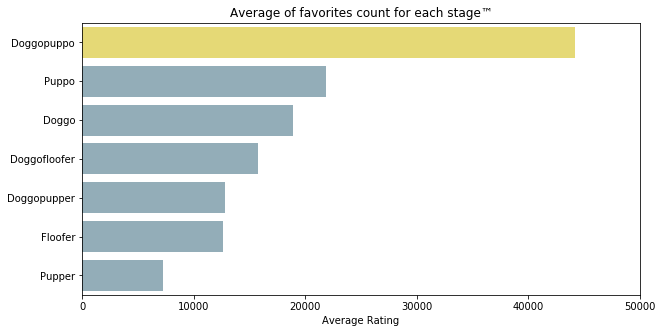

In [90]:

x_axis = list(stage_groups)
y_axis = [i.title() for i in stage_groups.index]


plt.figure(figsize=[10,5])
plt.xlim(0,50000)
plt.xlabel('Average Rating')
plt.title('Average of favorites count for each stage™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)

plt.show();

### Result:
***On average, Duggopuppo received 44,217 as the highest favorite count,while Pupper with 7312 favorite count received the lowest rate among other stages.***

### 2. Distribution of Dog Stages

pupper          1881
doggo            638
puppo            236
doggopupper       79
floofer           70
doggopuppo        11
doggofloofer      11
Name: stage, dtype: int64


Text(0.5, 1.0, 'The Distribution of Stage')

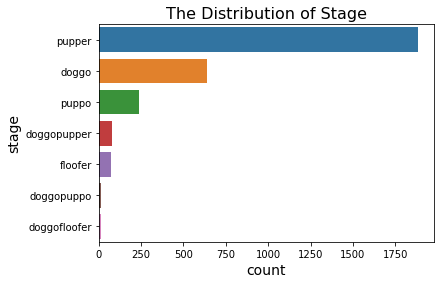

In [91]:
sorted_source = clean_twitter_archive['stage'].value_counts().index
print(clean_twitter_archive['stage'].value_counts())
sns.countplot(data = clean_twitter_archive, y = 'stage', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('count', fontsize=14)
plt.ylabel('stage', fontsize=14)
plt.title('The Distribution of Stage',fontsize=16)

### Result:
***The number of dogs at the "Pupper" stage is more distributed among the all stages.*** 

### 3. Corrolation between Retweets and Favorites  

Text(0.5, 1.0, 'The Corrolation between retweet and favorite counts')

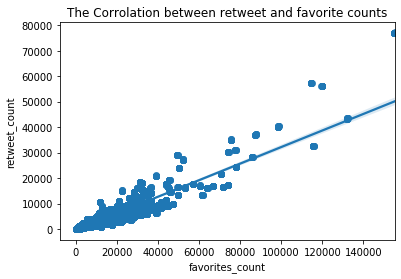

In [92]:
sns.regplot(x="favorites_count", y="retweet_count", data=clean_twitter_archive)
plt.title('The Corrolation between retweet and favorite counts',fontsize=12)

In [93]:
clean_twitter_archive.corr(method='pearson')

,tweet_id,rating_denominator,retweet_count,favorites_count,img_num,first_confidence,first_dog,second_confidence,second_dog,third_confidence,third_dog
tweet_id,1.000000,-0.020741,0.391397,0.624181,0.207032,0.106480,0.129448,-0.000476,0.131984,-0.045148,0.099287
rating_denominator,-0.020741,1.000000,-0.017334,-0.025112,-0.014554,0.011307,-0.006886,-0.036996,-0.008116,-0.006083,-0.002613
retweet_count,0.391397,-0.017334,1.000000,0.925287,0.103373,0.043076,0.007136,-0.013226,0.016964,-0.034474,0.009836
favorites_count,0.624181,-0.025112,0.925287,1.000000,0.126828,0.068432,0.051810,-0.016501,0.059769,-0.044049,0.038801
img_num,0.207032,-0.014554,0.103373,0.126828,1.000000,0.206799,0.033052,-0.158679,0.055373,-0.138202,0.062575
first_confidence,0.106480,0.011307,0.043076,0.068432,0.206799,1.000000,0.127435,-0.515008,0.146166,-0.708887,0.123325
first_dog,0.129448,-0.006886,0.007136,0.051810,0.033052,0.127435,1.000000,0.111144,0.638567,0.051249,0.557696
second_confidence,-0.000476,-0.036996,-0.013226,-0.016501,-0.158679,-0.515008,0.111144,1.000000,0.095912,0.482514,0.062235
second_dog,0.131984,-0.008116,0.016964,0.059769,0.055373,0.146166,0.638567,0.095912,1.000000,0.031596,0.555066
third_confidence,-0.045148,-0.006083,-0.034474,-0.044049,-0.138202,-0.708887,0.051249,0.482514,0.031596,1.000000,0.032185


***The above diagram shows that there is a strong positive relationship between favorite count and retweet count. Also the r square of two variables is 0.92 which proves the high corrolation between the two variables.***